## Brief Review of Thermodynamics for Batteries

### Classical electrostatics
First we'll talk about electrostatics, which describes the energy of electric charges, in the absence of chemical reacitons. 

- Electric potential: the electrical work needed to move a charge a certain distance, divided by the amount of charge. 

- Coulomb’s law indicates that the attractive potential between two atoms is a function of their charge: $\phi\ = q
_1q_2/r$ (oppositely charged ions attract each other, resulting in a negative, attractive, potential; similarly charged ions repel each other, resulting in a positive, repulsive potential). 

- As two atoms (or similarly charged ions) get closer, they repel each other. The Pauli exclusion principle forbids two electrons from occupying the same space. This repulsive force varies exponentially with ionic separation. 

- The sum (net) potential indicates the ideal interatomic distance that balances attractive with repulsive interactions

- The electric potential involves the movement of charge from one location to another, without regard for the chemical environment, which becomes important in electrochemical cells. Therefore, the electrochemical potential is a combination of chemical and electric potential.

- The Fermi level is the thermodynamic work needed to add one electron to a solid-state body. It is a thermodynamic quantity, defined as the energy level of an electron that has a 50% probability of being occupied at any given time (electrons occupy certain ranges of energy levels). 

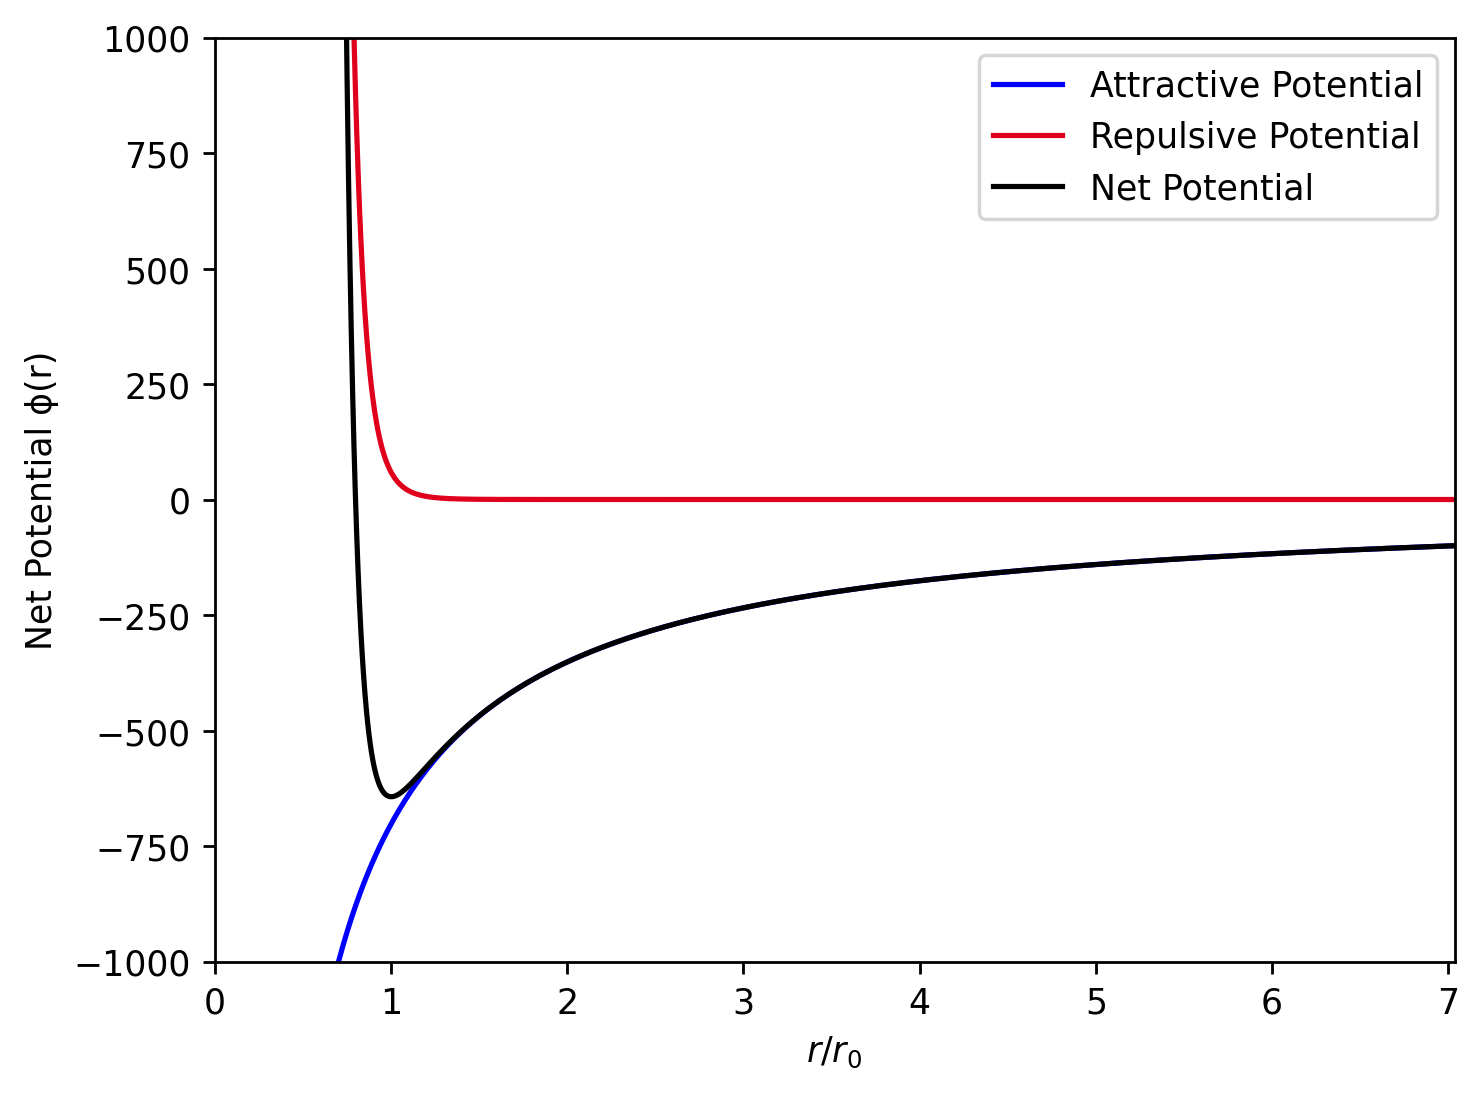

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

r1 = .01
r = np.linspace(0.0001, r1, 900) 

q1 = 1
q2 = -1
F_attractive = q1*q2/r

A = .002
F_repulsive = (A/r)**12
F_net = F_attractive + F_repulsive


r0 = r[np.argmin(F_net)] 

figure1 = plt.figure(dpi=250)

#Now Let's Plot
plt.plot(r/r0, F_attractive, label="Attractive Potential", color='b')
plt.plot(r/r0, F_repulsive, label="Repulsive Potential", color = '#E0001B')
plt.plot(r/r0, F_net, label="Net Potential", color = 'k')
plt.xlim(0,max(r/r0))
plt.ylim(-1000,1000)
plt.legend()
plt.ylabel("Net Potential ɸ(r)")
plt.xlabel("$r/r_0$")
plt.show()

### The electrochemical potential
How is electrostatics related to the electrochemical potential? The electrochemical potential is just the sum of the electrostatic potential and the chemical potential, and accounts for both the chemical reactions and the influence of electric charge. 

- By definition, the electrochemical potential is the partial molar Gibbs free energy of species i. It refers to the amount of work done to bring one mole of an ion from a standard state to a specified concentration and electric potential. 

$\overline{\mu}_i\ =\ \mu _i\ +\ z_i F \phi$

$\mu _i$ is the chemical potential of species i in J/mol ($\mu _i\ =\ \frac{\partial G}{\partial N_i}_{T,P}$)

$z_i$ is the ion charge, F is Faraday's constant, and $\phi$ the electrostatic potential

- The measured voltage of a given electrode is the difference in the electrochemical potential per charge between that electrode and a reference electrode. 

- The cell voltage is the difference between the two electrode potentials. You can measure this with a voltmeter (or multimeter). 

$E_{cell}\ =\ E_{cathode}\ -\ E_{anode}$

- The open circuit voltage (or open circuit potential, OCV or OCP) is the voltage with no load applied, and is related to the overall Gibbs free energy change. 

- The measured cell voltage is higher than the OCV on battery charge (positive overpotential), and lower than the OCV on battery discharge (negative overpotential). 

- Thermodynamics dictates the theoretical bounds of an electrochemical system. When a battery stops charging or discharging, it is held at OCV. Sometimes, it takes a long time for the battery to reach its true OCV, where it is at thermodynamic equilibrium (completely zero net flow of ions, heat, or any other macroscopic entity).

### Standard reduction potentials

Usually, we talk about electrochemical potentials using standard reduction potentials, which are relative measurements using a standard reference. 

- The standard reduction potential is defined as the potential at which a given species tends to be reduced. For instance, the reduction of a lithium ion to lithium metal (gains an electron) occurs at -3.04 V versus the standard hydrogen electrode.

- The standard hydrogen electrode, or SHE, is our typical reference. 

- Another example, $F_2$ is a strong oxidizer (+2.87 V versus SHE), so it tends to be reduced to $F^-$. On the other hand, Li is at the most negative reduction potential, so it tends to lose an electron and become $Li^+$ (so lithium is a strong reducing agent, and will readily donate an electron to another species). 

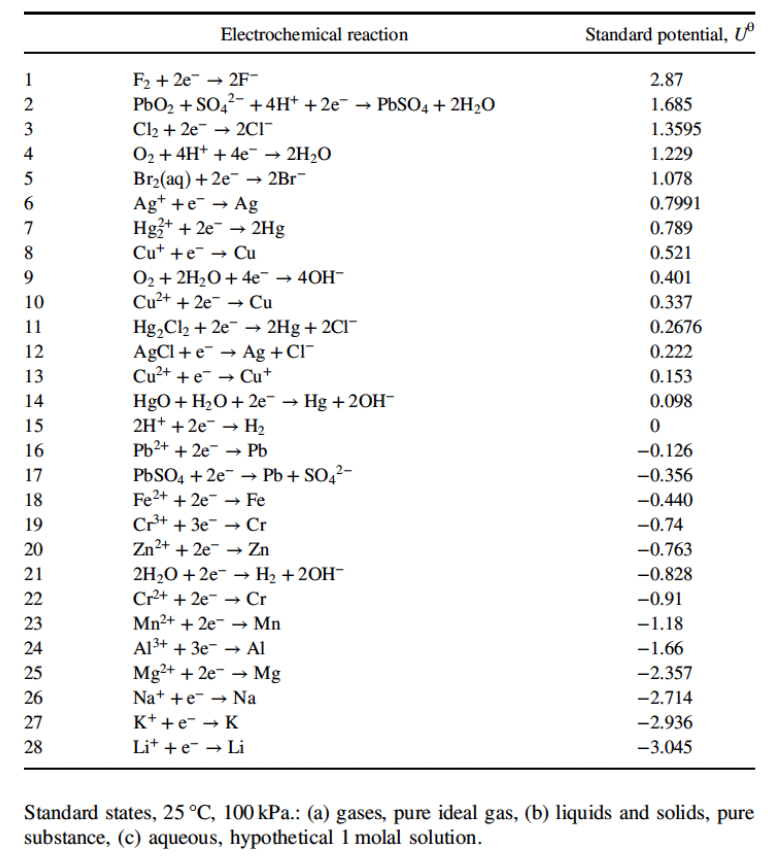

### Nernst equation

How do we relate the electrode potential that is measured, to concentrations of species involved in reactions? 

Consider a simple reaction that occurs on the surface of an electrode: $O\ +\ ne\ \rightleftharpoons \ R$ and is at equilibrium (thermodynamically reversible). 

Typically, this is described by the Nernst equation:

$E\ =\ E_0\ +\ \frac{RT}{nF}ln(\frac{C_O}{C_R})$

For an electrochemical cell, this defines each half reaction separately so that we have $E_{right}$ and $E_{left}$ and $E_{rxn}\ =\ E_{right}\ - E_{left}$. By convention, we relate a positive cell potential to spontaneous reactions (negative Gibbs free energies):

$\Delta G\ =\ -nFE_{rxn}$

Recall the Gibbs free energy is also related to the equilibrium constant of a reaction: $\Delta G\ =\ -RTln(K_{rxn})$

Example: now consider the case of $Cu^{2+}\ +\ 2e\ \rightleftharpoons\ Cu$

$E\ =\ E^0\ +\ \frac{RT}{nF} ln([Cu^{2+}])$ (the activity of metallic Cu is 1)

$$\Delta G\ =\ -nFE_{cell} $$

$$\Delta G^0\ =\ -nFE_{cell}^0 $$ 

$$\Delta G\ =\ \Delta G^0\ +\ RT\ ln(Q) $$

$$-nFE_{cell}\ =\ -nFE_{cell}^0\ +\ RT\ ln(Q) $$

$$E_{cell}\ =\ E_{cell}^0\ -RT/nF\ ln(Q) $$

$$E_{cell}\ =\ E_{cell}^0\ -RT/nF\ ln(1/[Li^+])  $$ 

### Reference potentials

When testing batteries, we usually just measure the cell voltage, or cell potential, which is the difference in the two electrode potentials. It is not possible to determine the individual electrode potentials just from this total cell voltage. To determine the individual electrode potentials, we'd need measure each with respect to a reference electrode. This is called a "three electrode cell". It's difficult to add such a reference electrode to an actual battery, so we usually implement this in R&D using a custom designed cell. Since many reference electrodes for aqueous systems are aqueous, we need some unique reference electrodes for the non-aqueous lithium batteries. It's common, for example, to measure an electrode potential versus a lithium metal reference. In this case, applying potentials below 0 V (versus Li/Li+) suggests we are plating lithium. 


### Thermodynamics of graphite negative electrodes

Recall: phase diagrams describe the equilibrium phase at a given temperature or pressure. For temperature-concentration plots, a binary phase diagram depicts the equilibrium phase across different compositions over a range of temperatures. 

For lithium insertion into graphite, $Li_xC_6$, a range of phases exists for 0 < x < 1. At low concentrations (i.e. discharged state of the battery), lithium intercalates randomly through the graphite ("stage 1"). As x > 0.04, lithium starts to intercalate into every 4th graphene sheet, and there is a phase transition from stage 1 to stage 4. Further transitions occur to stage 3, stage 2L and stage 2 and finally to a fully filled state (on average one lithium ion per six carbon atoms). (more in Session 5)

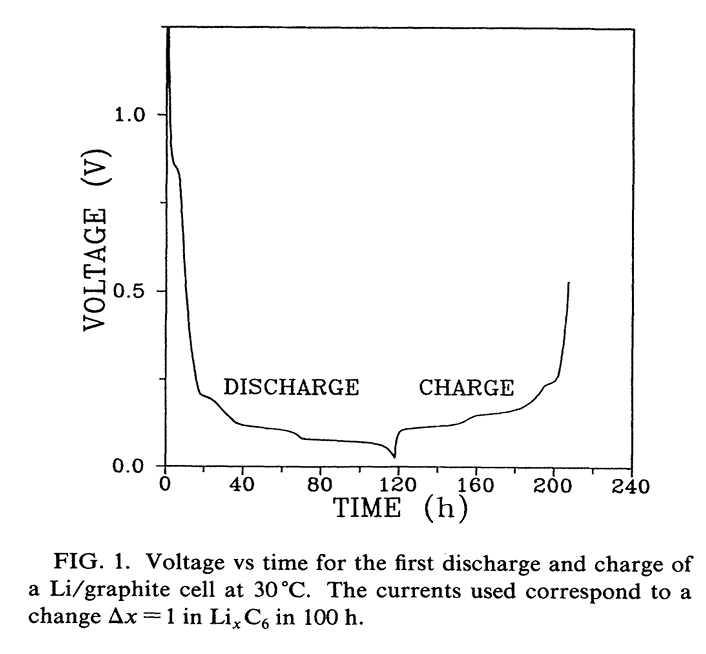

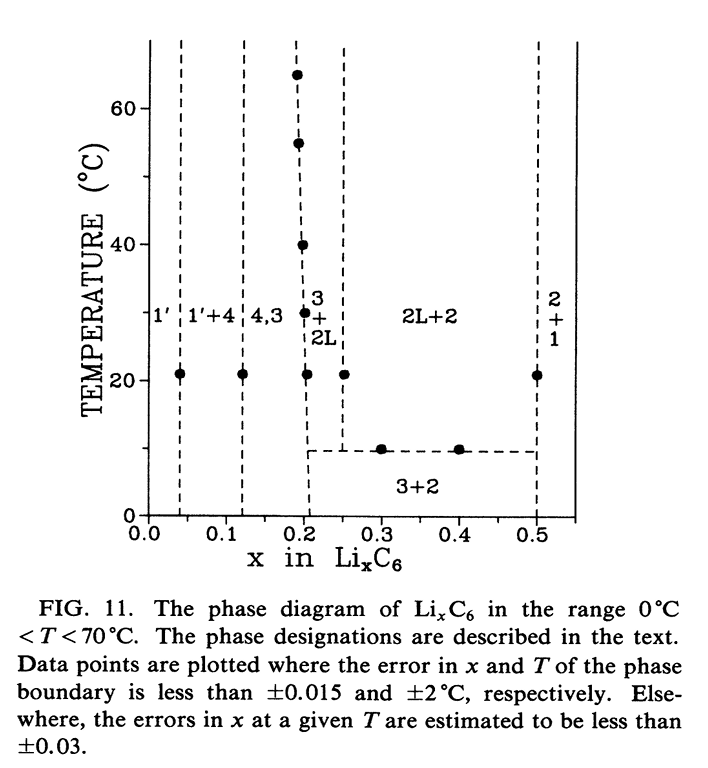

[ref: https://journals.aps.org/prb/abstract/10.1103/PhysRevB.44.9170]

The equilibrium phases can be measured if charging very slowly so that the electrode potential measurements reflect thermodynamic information. 

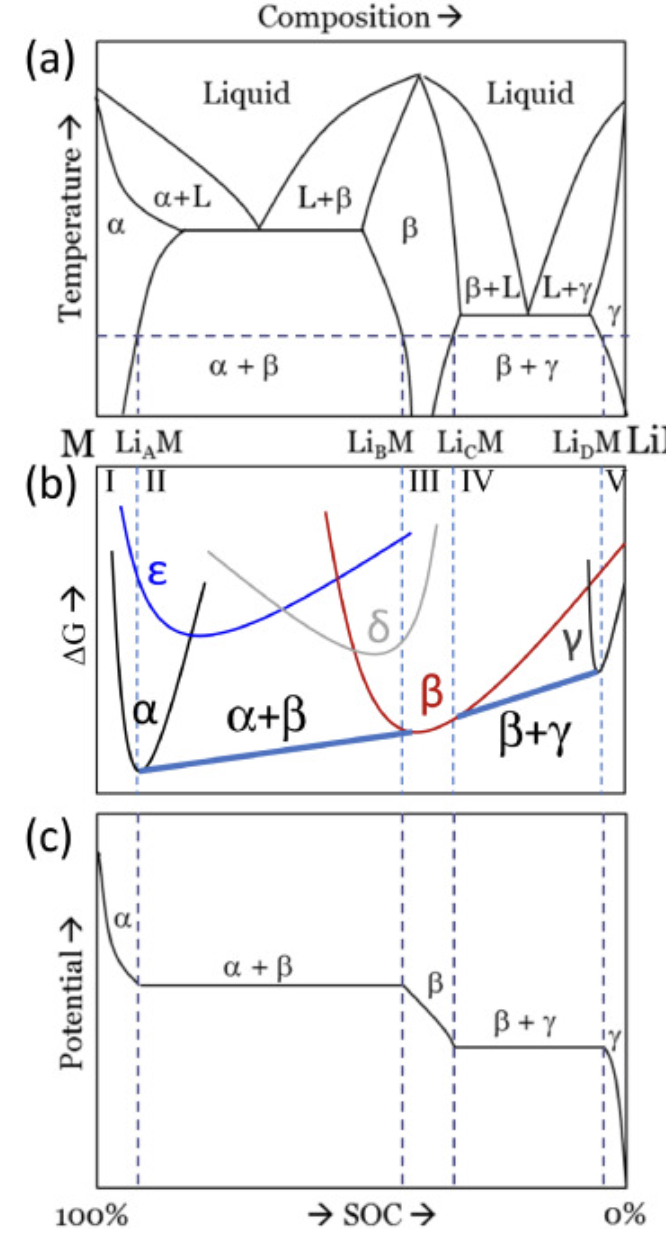

[ref: https://www.sciencedirect.com/science/article/pii/S0360128518300996?via%3Dihub#fig0003] 

### Why lithium metal?

Lithium is the lightest metal with the lowest reduction potential of all metals (-3.04 V versus SHE). This means you can make a high voltage battery with it that is also energy dense. Compared with the other alkali metals, it's also the least reactive as the valence electron is close to the nucleus. For larger alkali metal atoms, the additional valence electrons are further from the nucleus and feel less electrostatic attraction to the nucleus, so, they are more willing to give up their electrons. Attempting to make a rechargeable sodium, potassium or magnesium metal battery has encountered many challenges with extreme reactivity (even more than lithium). 

Take a look at the periodic table. Why don't we then just make a 6+ V battery using lithium metal and fluorine? 


## Thermodynamics of positive electrodes

Consider a Li-ion battery with lithium cobalt oxide ($LiCoO_2$) positive electrode and graphite negative electrode.

On charge, lithium intercalates into the graphite electrode. This is written as the following two half reactions: $LiCoO_2\  \rightarrow\ Li_{1-x}CoO_2\ +\ xe^-\ + xLi^+$

$C_6\ +\ xe^-\ + xLi^+\ \rightarrow\ Li_xC_6$

Where x < 0.55. If more lithium leaves LCO, it becomes unstable and evolves oxygen gas. 

Another common layered oxide is NMC, now used in many EV batteries.

Olivines are another type of positive electrode, a common one is lithium iron phosphate (LFP) which exhibits a flat voltage profile around 3.45 V versus Li/Li+. 

The thermodynamics of LFP vs NMC can be seen in OCV versus SOC plots. These are obtained by measuring the OCV at every state of charge by first charging to that SOC and then resting the battery until it reaches quasi-equilibrium. 

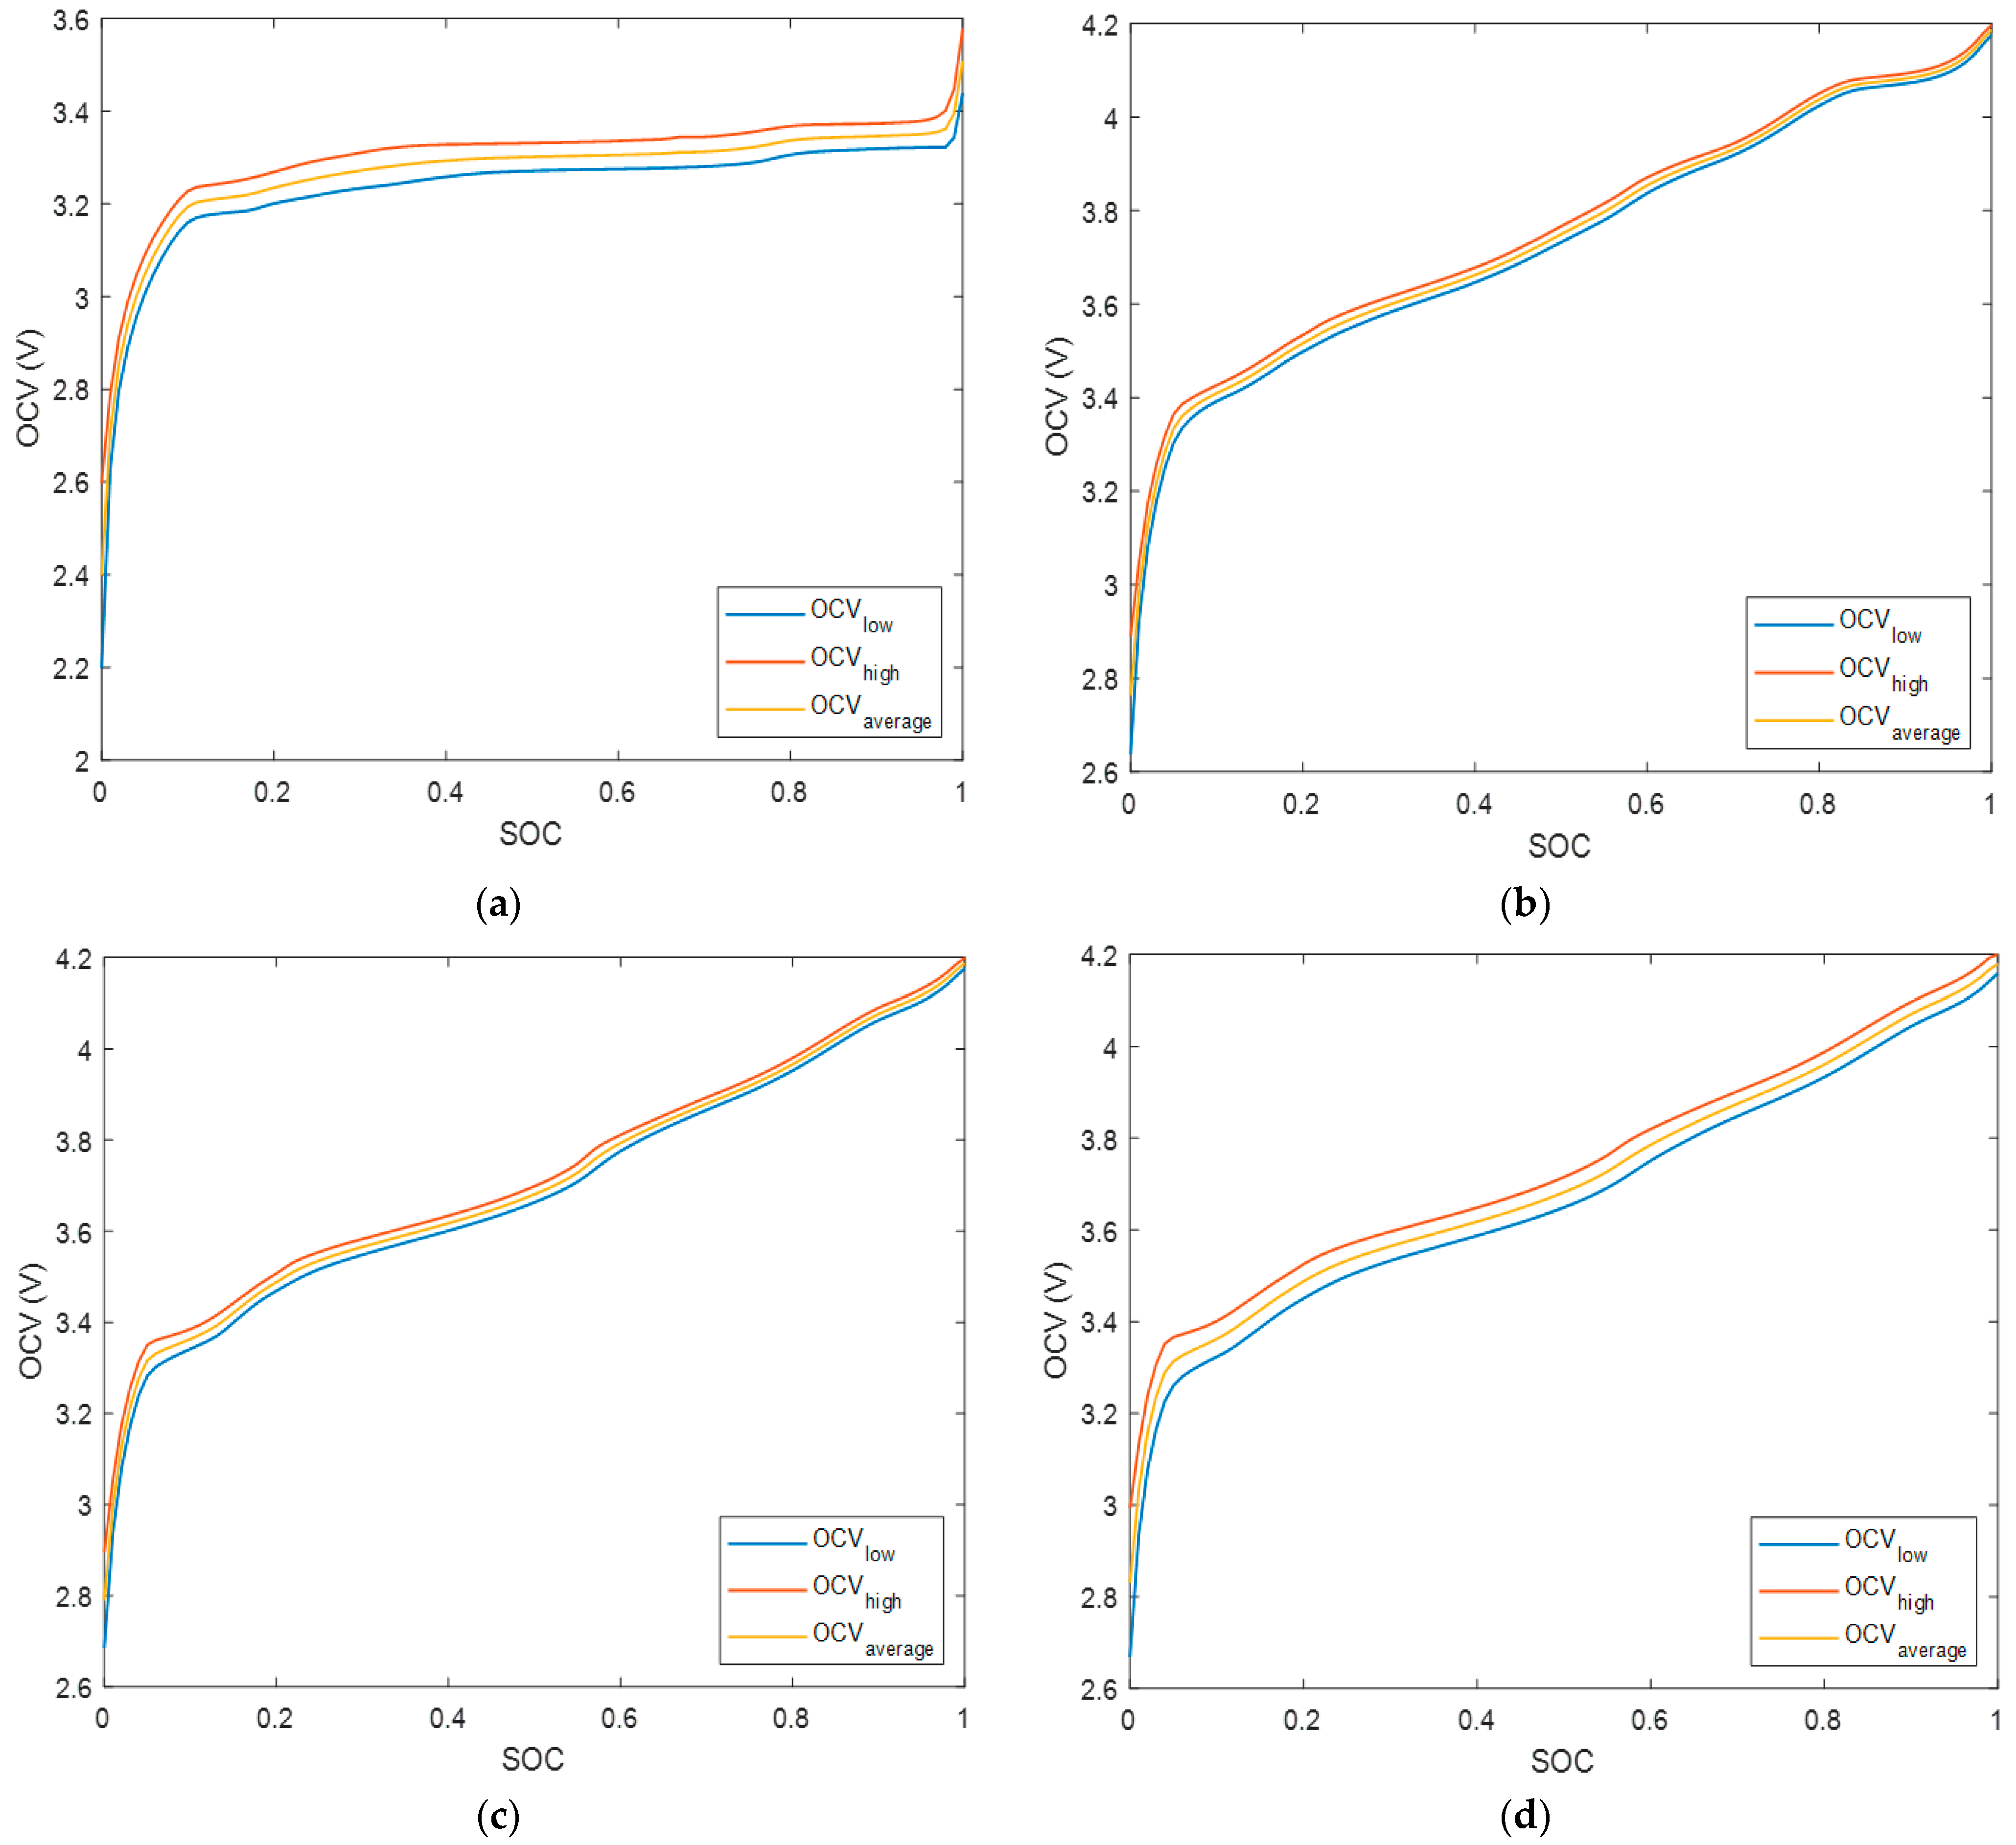

[ref: https://www.mdpi.com/2313-0105/7/3/51]

- LFP has a lower OCV at all SOCs versus other positive electrodes. Remember that the full cell voltage measurement is a sum of both the positive and negative. Slight shifts in the voltage curve of LFP batteries in the two phase region are attributed to graphite phase transitions.  

- Batteries are dynamically changing - current rate and operation in various temperature conditions will impact the OCV significantly, and should be accounted for. 

- Recall that the OCV is synonymous with thermodynamic free energy; just as phase diagrams indicate changes in the preferred phase with temperature and composition, the OCV will similarly be affected by changes in composition (but regimes of phase coexistence may result in a flat OCV profile, such as LFP) 

** Summarize the graphite half cell and LFP/NMC half cell potentials over the full range of charge and discharge

### Problem Set 1

a) Quick review

1. True or False. The electrochemical potential is a combination of chemical and electrical potential.
2. The cell voltage is the difference between two __ potentials
3. The open circuit voltage (OCV) is the voltage with no __ applied
4. True or False. Lithium-ion batteries operate within the thermodynamic stability window of the electrolytes.
5. The OCV curve is independent of electrode structural change.
6. Which of the following is related to thermodynamics? a) measured battery voltage, b) battery charge rates, c) the OCV, d) working electrode potential measurements from three-electrode cells 

b) Now consider a zinc-bromine battery. This type of battery is useful for grid storage applications but not for EVs because it has low energy density. When you charge a zinc bromine battery, zinc is plated on the negative electrode and bromine is produced on the positive electrode. A typical electrolyte is 1M ZnBr in H2O/H2SO4. Write down the two half reactions of this battery, and after consulting a table of standard reduction potentials, write down the full cell reaction including the half cell potentials and the total cell potential. What phases do you expect each species to be in? 

c) We determined the theoretical capacity of graphite as 372 milliampere-hours per gram of graphite. Calculate the theoretical capacity of a sulfur cathode, knowing that we use $Li_2S$, which is comprised of two equivalents of lithium with one equivalent of sulfur. Based on this value, why is sulfur considered to be a "next-generation battery material"? What is the approximate energy density of a lithium metal - sulfur battery, assuming a nominal voltage of 2.2 V? 